In [1]:
# Conformal Prediction Example1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [3]:
# Read input data

In [4]:
data =  pd.read_csv('problem7.csv')
data.head()
print(data.head())

   yield  current  total    ROA  ctype
0   0.00   232.86 -51.20 -10.46      0
1   3.15   329.02 -31.09  10.64      1
2   0.00   284.37 -30.14  -4.65      0
3   0.00   112.45 -25.08  -6.36      0
4   0.00   180.66 -23.71  -6.88      0


In [5]:
# 驗證是否讀取正確

In [6]:
print(data)

      yield  current   total    ROA  ctype
0      0.00   232.86  -51.20 -10.46      0
1      3.15   329.02  -31.09  10.64      1
2      0.00   284.37  -30.14  -4.65      0
3      0.00   112.45  -25.08  -6.36      0
4      0.00   180.66  -23.71  -6.88      0
...     ...      ...     ...    ...    ...
1002   1.45   158.37  108.18   2.87      0
1003   1.46   119.40  108.70   6.13      0
1004   1.38   547.38  124.87  29.47      0
1005   0.92   269.57  142.77   9.86      0
1006   1.26   117.08  166.72   2.83      0

[1007 rows x 5 columns]


In [7]:
# 資料筆數

In [8]:
totalsample=data.shape[0]
print(totalsample)

1007


In [9]:
# 資料分割

In [10]:
X = data.iloc[:,0:4].values
Y = data['ctype'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .25,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test

In [11]:
# 資料正規化

In [12]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [13]:
#建立Naive Bayes model

In [14]:
clf = GaussianNB(var_smoothing=0.0000001)
clf.fit(X_train,Y_train)

GaussianNB(var_smoothing=1e-07)

In [15]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)

In [16]:
y_predproba=clf.predict_proba(X_test)
y_predprobatrain=clf.predict_proba(X_train)
print(y_predproba[6,:])

[0.00151042 0.99848958]


In [17]:
print('Accuracy score:',accuracy_score(Y_test,y_pred))

Accuracy score: 0.8928571428571429


0.8928571428571429 accuracy
0.893491124260355 precision

0.94375 recall

0.9179331306990881 f1 score

0.9685461956521739 AUC


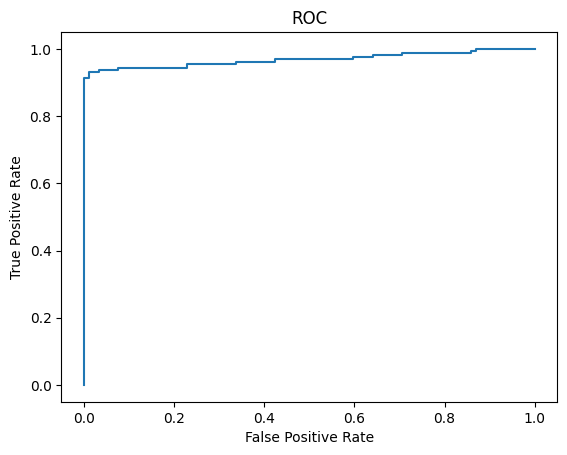

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predproba[:,1])

df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc2.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(Y_test,y_pred),"accuracy")
print(precision_score(Y_test,y_pred),"precision")
print()
print(recall_score(Y_test,y_pred),"recall")
print()
print(f1_score(Y_test,y_pred),"f1 score")
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")

In [19]:
df1=data[data.ctype==0]
class1evidence=df1.shape[0]/totalsample
print(class1evidence)
df2=data[data.ctype==1]
class2evidence=df2.shape[0]/totalsample
print(class2evidence)

0.38629592850049654
0.6137040714995035


In [20]:
import openpyxl
wb=openpyxl.Workbook()
s1=wb.active
s1['A1']='Yield'
s1['B1']='Current'
s1['C1']='Total'
s1['D1']='ROA'
s1['E1']='MP'
wb.save('output.xlsx')
wb.save('output1.xlsx')

In [21]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
zp=[]
mp=[]
px=[]
py=[]
workbook=openpyxl.load_workbook('output.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_traino[i]==0):
        yp.append(y_predprobatrain[i,0])
        xp.append(X_traino[i,:])
        
testtotal=X_testo.shape[0]
for i in range(testtotal):
    if(Y_testo[i]==0):
        yp.append(y_predproba[i,0])
        xp.append(X_testo[i,:])
        
df1=data[data.ctype==0]
print(df1.shape[0])

for k in range(df1.shape[0]):
    zp.append(yp[k]*class1evidence)
    mp.append(0)


zsup=max(zp)
for k in range(df1.shape[0]):
    zp[k]=zp[k]/zsup

for i in range(df1.shape[0]):
    zz=0
    for j in range(df1.shape[0]):
        if(zp[i]>=zp[j]):
            zz=zz+1
    mp[i]=zz/df1.shape[0]

j=2
for k in range(len(yp)):
    if(mp[k]>=0.5):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=xp[k][2]
        sheet.cell(j,4).value=xp[k][3]
        sheet.cell(j,5).value=mp[k]
        j+=1
workbook.save('output.xlsx')
workbook=openpyxl.load_workbook('output1.xlsx')
sheet=workbook.active
jk=2
for k in range(len(yp)):
    if(yp[k]>=0.5):
        sheet.cell(jk,1).value=xp[k][0]
        sheet.cell(jk,2).value=xp[k][1]
        sheet.cell(jk,3).value=xp[k][2]
        sheet.cell(jk,4).value=xp[k][3]
        sheet.cell(jk,5).value=yp[k]
        jk+=1

workbook.save('output1.xlsx')



389


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)

In [23]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test,y_pred3)
auc_score7=roc_auc_score(Y_test, y_pred3)
print(fpr3)
print(tpr3)
print(thresholds3)
print(auc_score7)
y_pred3 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(Y_test, y_pred3)
print(cm3)

[0.         0.04347826 1.        ]
[0.      0.95625 1.     ]
[inf  1.  0.]
0.9563858695652174
[[ 88   4]
 [  7 153]]


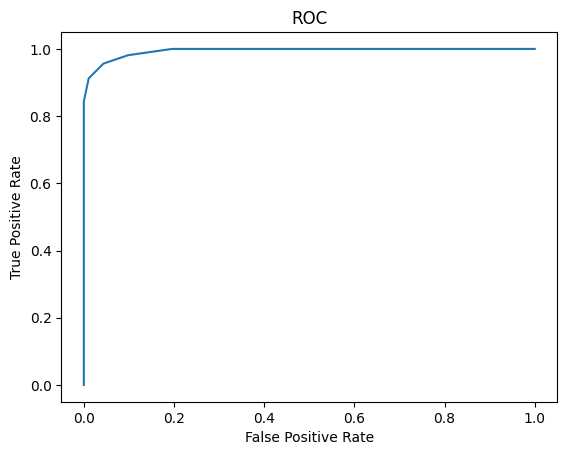

In [24]:
y_predproba12=knn.predict_proba(X_test)
false_positive_rate12, true_positive_rate12, thresholds12 = roc_curve(Y_test, y_predproba12[:,1])
df6 = pd.DataFrame({'Threshold': thresholds12, 
              'TPR': true_positive_rate12, 
              'FPR':false_positive_rate12
             })
df6.to_csv("roc12.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate12, true_positive_rate12)

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)
y_pred7 = logistic_classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred7))
from sklearn.metrics import roc_curve, auc
fpr31, tpr31, thresholds31 = roc_curve(Y_test,y_pred7)
auc_score8=roc_auc_score(Y_test, y_pred7)
print(fpr31)
print(tpr31)
print(thresholds31)
print(auc_score8)
from sklearn.metrics import confusion_matrix,accuracy_score
cm31 = confusion_matrix(Y_test, y_pred7)
print(cm31)

[[ 92   0]
 [  0 160]]
[0. 0. 1.]
[0. 1. 1.]
[inf  1.  0.]
1.0
[[ 92   0]
 [  0 160]]


In [27]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(4, ), activation='relu',alpha=1.e-5,solver='adam')
neural_network.fit(X_train, Y_train) 
y_pred10 = neural_network.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test, y_pred10)
from sklearn.metrics import roc_curve, auc
fpr10, tpr10, thresholds10 = roc_curve(Y_test,y_pred10)
auc_score10=roc_auc_score(Y_test, y_pred10)
print(fpr10)
print(tpr10)
print(thresholds10)
print(auc_score10)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test, y_pred10)
print(cm10)

[0.        0.0326087 1.       ]
[0.  0.9 1. ]
[inf  1.  0.]
0.933695652173913
[[ 89   3]
 [ 16 144]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
import sklearn.svm 
# Create an instance of the SVC class 
svm = sklearn.svm.SVC(kernel='rbf', C=1.0) 
# Fit the model to the training data 
svm.fit(X_train, Y_train) 
# Predict the labels of new data 
y_pred11 = svm.predict(X_test)
fpr11, tpr11, thresholds11 = roc_curve(Y_test,y_pred11)
auc_score11=roc_auc_score(Y_test, y_pred11)
print(fpr11)
print(tpr11)
print(thresholds11)
print(auc_score11)
from sklearn.metrics import confusion_matrix,accuracy_score
cm11 = confusion_matrix(Y_test, y_pred11)
print(cm11)

[0.         0.02173913 1.        ]
[0.      0.98125 1.     ]
[inf  1.  0.]
0.9797554347826086
[[ 90   2]
 [  3 157]]


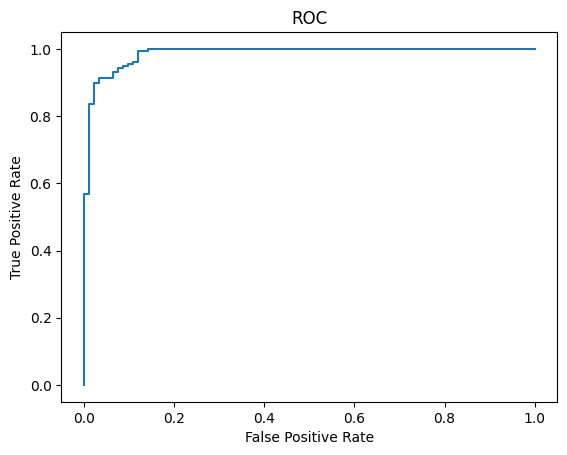

In [29]:
y_predproba11=neural_network.predict_proba(X_test)
false_positive_rate11, true_positive_rate11, thresholds11 = roc_curve(Y_test, y_predproba11[:,1])
df3 = pd.DataFrame({'Threshold': thresholds11, 
              'TPR': true_positive_rate11, 
              'FPR':false_positive_rate11
             })
df3.to_csv("roc10.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate11, true_positive_rate11)